<img src="Images/HSP2.png" />
This Jupyter Notebook Copyright 2017 by RESPEC, INC.  All rights reserved.

$\textbf{HSP}^{\textbf{2}}\ \text{and}\ \textbf{HSP2}\ $ Copyright 2017 by RESPEC INC. and released under this [License](LegalInformation/License.txt)

## Youtube Video Developed for HSP2 and this Tutorial

In [5]:
from IPython.display import HTML
HTML('<iframe width="896" height="504" src="https://www.youtube.com/embed/aeLScKsP1Wk?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

## Required Python imports  and setup

In [1]:
import os
import site
site.addsitedir(os.getcwd().rsplit('\\',1)[0] + '\\')  # adds your path to the HSP2 software.

hdfname = 'TutorialData/tutorial.h5'

import shutil
import numpy as np
import pandas as pd
pd.options.display.max_rows    = 18
pd.options.display.max_columns = 10
pd.options.display.float_format = '{:.2f}'.format  # display 2 digits after the decimal point

import HSP2
import HSP2tools

import qgrid
# Tell qgrid to automatically render all DataFrames and Series as qgrids.
qgrid.enable()
# Disable automatic display so we can display DataFrames in the normal way
# qgrid.disable()

import matplotlib.pyplot as m_plt
%matplotlib inline

HSP2tools.reset_tutorial()    # make a new copy of the tutorial's data
HSP2tools.versions()          # display version information below


QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

## Importing UCI & WDM Files into HDF5<a id='section1'></a>

In [2]:
uciname = 'TutorialData/TEST10.UCI'          
wdmname = 'TutorialData/TEST.WDM'

unpackedhdfname = 'TutorialData/unpackedtutorial.h5'
hdfname = 'TutorialData/Tutorial.h5'

In [3]:
HSP2tools.makeH5()
HSP2tools.readUCI(uciname, unpackedhdfname)
HSP2tools.ReadWDM(wdmname, unpackedhdfname)
!ptrepack {unpackedhdfname}  TutorialData\tutorial.h5

DONE


C:\Users\Jason.Love\HSPsquared-master\HSP2tools\uciReader.py:447: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)
C:\Users\Jason.Love\AppData\Local\Continuum\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: FutureWarning: get_store is deprecated and be removed in a future version
HDFStore(path, **kwargs) is the replacement
  interactivity=interactivity, compiler=compiler, result=result)


uciReader is Done
Processing WDM file TutorialData/TEST.WDM
/TIMESERIES/TS131 H 1976-01-01T00:00:00 1977-01-01T00:00:00 8784 NA
/TIMESERIES/TS42 D 1976-01-01T00:00:00 1977-01-01T00:00:00 366 NA
/TIMESERIES/TS46 H 1976-01-01T00:00:00 1977-01-01T00:00:00 4392 NA
/TIMESERIES/TS135 D 1976-01-01T00:00:00 1977-01-01T00:00:00 366 NA
/TIMESERIES/TS41 D 1976-01-01T00:00:00 1977-01-01T00:00:00 366 NA
/TIMESERIES/TS122 H 1976-01-01T00:00:00 1977-01-01T00:00:00 4392 NA
/TIMESERIES/TS125 D 1976-01-01T00:00:00 1977-01-01T00:00:00 366 NA
/TIMESERIES/TS39 H 1976-01-01T00:00:00 1977-01-01T00:00:00 8784 NA
/TIMESERIES/TS126 D 1976-01-01T00:00:00 1977-01-01T00:00:00 366 NA
/TIMESERIES/TS123 H 1976-01-01T00:00:00 1977-01-01T00:00:00 4392 NA
/TIMESERIES/TS140 D 1976-01-01T00:00:00 1977-01-01T00:00:00 366 NA
Done with TutorialData/TEST.WDM
Problems doing the copy from 'TutorialData/unpackedtutorial.h5:/ (RootGroup) ''' to 'TutorialData\tutorial.h5:/ (RootGroup) '''
The error was --> <class 'tables.exception

Traceback (most recent call last):
  File "C:\Users\Jason.Love\AppData\Local\Continuum\anaconda2\Scripts\ptrepack-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Jason.Love\AppData\Local\Continuum\anaconda2\lib\site-packages\tables\scripts\ptrepack.py", line 528, in main
    use_hardlinks=True)
  File "C:\Users\Jason.Love\AppData\Local\Continuum\anaconda2\lib\site-packages\tables\scripts\ptrepack.py", line 245, in copy_children
    raise RuntimeError("Please check that the node names are not "
RuntimeError: Please check that the node names are not duplicated in destination, and if so, add the --overwrite-nodes flag if desired. In particular, pay attention that root_uep is not fooling you.


## Run $\textbf{HSP}^\textbf{2}$

In [8]:
HSP2.run??

Signature: HSP2.run(hdfname, saveall=False, reloadkeys=False)
Source:   
def run(hdfname, saveall=False, reloadkeys= False):
    ''' runs main HSP2 program
     saveall    - (optional) saves all calculated data ignoring SAVE tables
     reloadkeys - (optional) regenerates keys, used after adding new modules'''

    if not os.path.exists(hdfname):
        print (hdfname + ' HDF5 File Not Found, QUITTING')
        return
    stime = dt.now()
    logpath = os.path.join(os.path.dirname(hdfname), 'logfile.txt')
    with pd.HDFStore(hdfname) as store, open(logpath, 'w') as logfile:
        msg = messages(logfile)
        msg(1, 'Run Started for file ' + hdfname)

        # ordered list of modules replacing function names with real functions
        sequence = defaultdict(list)
        for _,x in store['HSP2/CONFIGURATION'].sort_values(by=['Order']).iterrows():
            if x.Function and x.Function != 'noop':
                importlib.import_module(x.Module)
                x.Function = ev

In [4]:
HSP2.run(hdfname, saveall=True)

2017-12-18 21:28:52.21   Run Started for file TutorialData/Tutorial.h5
2017-12-18 21:28:52.27     Start 1976-01-01 00:00    Stop 1976-12-31 23:59
2017-12-18 21:28:52.81   Finished setup
2017-12-18 21:28:52.81      PERLND P001   DELT=60
2017-12-18 21:28:53.01      RCHRES R001   DELT=60
2017-12-18 21:28:53.12      RCHRES R002   DELT=60
2017-12-18 21:28:53.17      RCHRES R003   DELT=60
2017-12-18 21:28:53.21      RCHRES R004   DELT=60
2017-12-18 21:28:53.28      IMPLND I001   DELT=60
2017-12-18 21:28:53.34      RCHRES R005   DELT=60
2017-12-18 21:28:53.39   Run completed
Run time is 0:00:01.206000


In [6]:
# Review simulated hydraulic state variables and fluxes from hdf5 file for Reach 1
tsMaster = pd.read_hdf(hdfname, '/RESULTS/RCHRES_R001/HYDR')
tsMaster

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

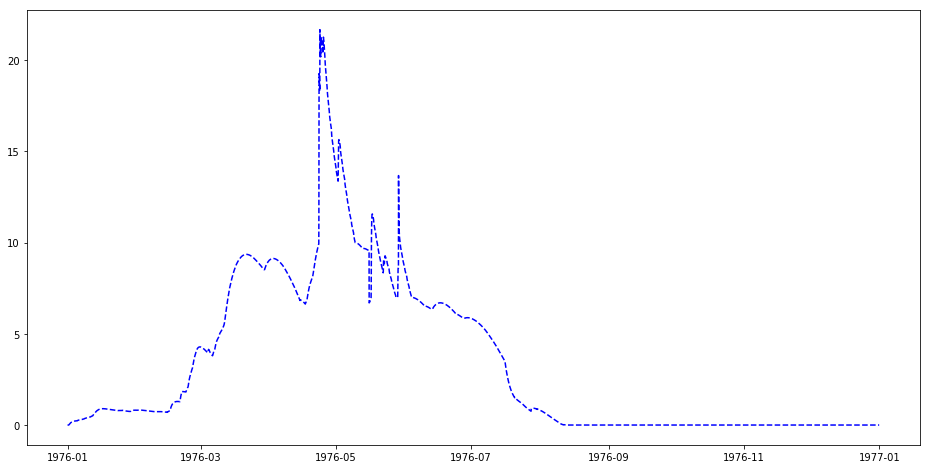

In [7]:
# Create a Plot of RCHRES 1 Flow
m_plt.figure(figsize=(16,8))
m_plt.plot('RO', 'b--', data=tsMaster,   label='Master')

In [8]:
# Creeate a DateFrame, Calculate Summart Stats, and Save for Later
columns = ['Master','Run1','Run3', 'Run4']
dfStats = pd.DataFrame(columns=columns)
dfStats.Master = tsMaster.RO.describe()

dfStats.Master

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

## There are Multiple ways we Can Change Parameters

###  Using HSP2Tools.Fetch and then HSP2Tools.replace

In [9]:
replaceinfo, df = HSP2tools.fetch(hdfname, 'PERLND', 'PWATER', 'PARAMETERS')
replaceinfo, df

(('TutorialData/Tutorial.h5', 'PERLND', 'PWATER'),
       AGWETP  AGWRC  BASETP  CEPSC  DEEPFR  ...   PETMIN  SLSUR  UZSN  FZG  \
 P001    0.08   0.98    0.00   0.00    0.10  ...    35.00   0.05  0.01 1.00   
 
       FZGL  
 P001  0.10  
 
 [1 rows x 22 columns])

In [10]:
# Check Value of LZSN
df.LZSN

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

In [11]:
# Change and Replace using HSP2Tools.replace?? 
df.LZSN = 12
HSP2tools.replace(replaceinfo, df)

### Use Pandas to Read and Write

In [13]:
datapath = '/PERLND/PWATER/PARAMETERS'
df2 = pd.read_hdf(hdfname, datapath)
df2.T

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

In [151]:
# Write to HDF
df2.LZSN = 8
df2.to_hdf(hdfname, '/PERLND/PWATER/PARAMETERS', data_columns=True, format='table')

In [152]:
# Verify Changed
df2 = pd.read_hdf(hdfname, datapath)
df2.LZSN

P001    8
Name: LZSN, dtype: int64

### Use Pandas and Qgrid Functionality to Update Parameters

In [30]:
# List the dataframe and edit Qgrid directly (e.g., dbl click and change LZSN to 6) then use qgrid_widget.get_changed_df()
qgrid_widget = qgrid.QgridWidget(df=df2.T, show_toolbar=True)
qgrid_widget


QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5, show_toolbar=True)

In [31]:
df3 = qgrid_widget.get_changed_df()
df3.T.to_hdf(hdfname, '/PERLND/PWATER/PARAMETERS', data_columns=True, format='table')

In [32]:
# Verify Changed
df2 = pd.read_hdf(hdfname, datapath)
df2.LZSN

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

### Use HSPTools.csvReader to Update Paramters

In [14]:
pd.read_csv('TutorialData/PERLND.csv')

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

In [33]:
# Use CSV to Update the HDF5 File
HSP2tools.csvReader(hdfname, 'TutorialData/PERLND.csv', 'PERLND', 'PWATER')
# verify changed
var = ['INFILT','LZSN']
pd.read_hdf(hdfname, datapath)[var]

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

### Use HSPTools.DoE (Design of Experiment) function to Update Paramters

In [34]:
# How Can we Cange Multiple Parameters and Track Changes
# Using the HSP2.DoE approach allows us to create new folders within HDF5 file to document 
# changes from base and store new results
data = [
 ['1', 'PERLND', 'P001', 'PWATER', 'INFILT',   0.075],
 ['1', 'PERLND', 'P001', 'PWATER', 'LZSN',         4],
 ['2', 'PERLND', 'P001', 'PWATER', 'INFILT',    0.30],
 ['2', 'PERLND', 'P001', 'PWATER', 'LZSN',      12.0]]

doe = pd.DataFrame(data, columns=['Run', 'Operation', 'Segment', 'Module', 'Parameter', 'Value'])
doe

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

In [35]:
HSP2.run_DoE(hdfname, 'Sensitivity_LZSN_INFILT', doe, saveall=True)

2017-12-18 21:47:55.05   HSP2 Started for file TutorialData/Tutorial.h5
2017-12-18 21:47:55.05      Design of Experiment HDF5 directory is Sensitivity_LZSN_INFILT
2017-12-18 21:47:55.05     Start 1976-01-01 00:00    Stop 1976-12-31 23:59
2017-12-18 21:47:55.77   Finished setup
2017-12-18 21:47:55.84      Starting RUN 1
2017-12-18 21:47:55.84      PERLND P001   DELT=60
2017-12-18 21:47:55.98      RCHRES R001   DELT=60
SIMPATH is Sensitivity_LZSN_INFILT/RESULTS/RUN1/PERLND_P001/PWATER
2017-12-18 21:47:56.01      RCHRES R002   DELT=60
SIMPATH is Sensitivity_LZSN_INFILT/RESULTS/RUN1/RCHRES_R001/HYDR
2017-12-18 21:47:56.07      RCHRES R003   DELT=60
SIMPATH is Sensitivity_LZSN_INFILT/RESULTS/RUN1/RCHRES_R001/HYDR
2017-12-18 21:47:56.11      RCHRES R004   DELT=60
SIMPATH is Sensitivity_LZSN_INFILT/RESULTS/RUN1/RCHRES_R002/HYDR
SIMPATH is Sensitivity_LZSN_INFILT/RESULTS/RUN1/RCHRES_R003/HYDR
2017-12-18 21:47:56.15      RCHRES R005   DELT=60
SIMPATH is Sensitivity_LZSN_INFILT/RESULTS/RUN1/IMPL

In [36]:
# Acquire and Calculate Stats on Run 1 & Run 2 and Compare to Master
tsRun_1  = pd.read_hdf(hdfname, 'Sensitivity_LZSN_INFILT/RESULTS/RUN1/RCHRES_R001/HYDR')
tsRun_2  = pd.read_hdf(hdfname, 'Sensitivity_LZSN_INFILT/RESULTS/RUN2/RCHRES_R001/HYDR')

dfStats.Run1 = tsRun_1.RO.describe()
dfStats.Run2 = tsRun_2.RO.describe()
dfStats

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

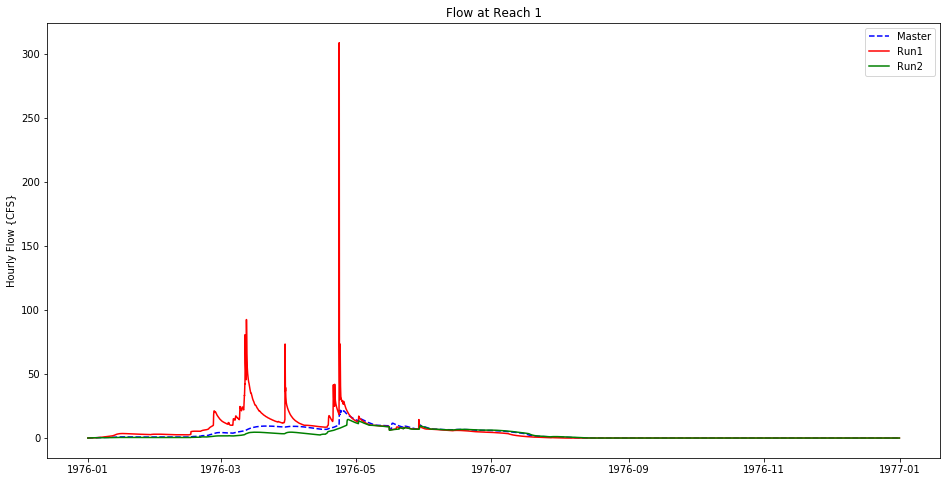

In [37]:
m_plt.figure(figsize=(16,8))
m_plt.plot('RO', 'b--', data=tsMaster,   label='Master')
m_plt.plot('RO', 'r',   data=tsRun_1,    label='Run1')
m_plt.plot('RO', 'g-',   data=tsRun_2,  label='Run2')
m_plt.title('Flow at Reach 1')
m_plt.ylabel('Hourly Flow {CFS}')
m_plt.legend(loc='best') 

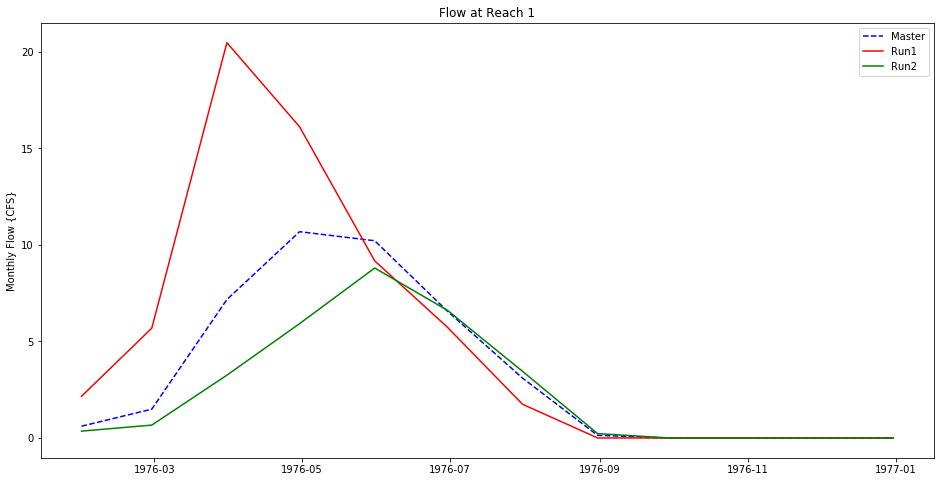

In [38]:
# Resample for Monthly Flow
m_plt.figure(figsize=(16,8))
m_plt.plot('RO', 'b--', data=tsMaster.resample('M').mean(),   label='Master')
m_plt.plot('RO', 'r',   data=tsRun_1.resample('M').mean(),    label='Run1')
m_plt.plot('RO', 'g-',   data=tsRun_2.resample('M').mean(),  label='Run2')
m_plt.title('Flow at Reach 1')
m_plt.ylabel('Monthly Flow {CFS}')
m_plt.legend(loc='best') 

In [39]:
# Use DoE approach to do a quick sensitivity analysis of LZSN
N = 20   # number of runs - generally large such as 1000 or 10,000
data = []
for r in range(1, N+1):
    run = str(r+10)
    data.append([run,'PERLND','P001','PWATER','LZSN', 1 + float(np.random.rand(1)) * 15])
   
doe = pd.DataFrame(data, columns=['Run', 'Operation', 'Segment', 'Module', 'Parameter', 'Value'])
doe

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

In [40]:
HSP2.run_DoE(hdfname, 'P001_LZSN', doe)

2017-12-18 21:48:52.10   HSP2 Started for file TutorialData/Tutorial.h5
2017-12-18 21:48:52.10      Design of Experiment HDF5 directory is P001_LZSN
2017-12-18 21:48:52.11     Start 1976-01-01 00:00    Stop 1976-12-31 23:59
2017-12-18 21:48:52.80   Finished setup
2017-12-18 21:48:52.82      Starting RUN 11
2017-12-18 21:48:52.83      PERLND P001   DELT=60
2017-12-18 21:48:52.94      RCHRES R001   DELT=60
SIMPATH is P001_LZSN/RESULTS/RUN11/PERLND_P001/PWATER
2017-12-18 21:48:52.99      RCHRES R002   DELT=60
SIMPATH is P001_LZSN/RESULTS/RUN11/RCHRES_R001/HYDR
2017-12-18 21:48:53.01      RCHRES R003   DELT=60
SIMPATH is P001_LZSN/RESULTS/RUN11/RCHRES_R001/HYDR
2017-12-18 21:48:53.06      RCHRES R004   DELT=60
SIMPATH is P001_LZSN/RESULTS/RUN11/RCHRES_R002/HYDR
SIMPATH is P001_LZSN/RESULTS/RUN11/RCHRES_R003/HYDR
2017-12-18 21:48:53.13      RCHRES R005   DELT=60
SIMPATH is P001_LZSN/RESULTS/RUN11/IMPLND_I001/IWATER
NEED NON SIMPATH DATA /RESULTS/IMPLND_I001/IWATER
SIMPATH is P001_LZSN/RESUL

2017-12-18 21:48:56.90      Starting RUN 22
2017-12-18 21:48:56.90      PERLND P001   DELT=60
2017-12-18 21:48:57.01      RCHRES R001   DELT=60
SIMPATH is P001_LZSN/RESULTS/RUN22/PERLND_P001/PWATER
2017-12-18 21:48:57.06      RCHRES R002   DELT=60
SIMPATH is P001_LZSN/RESULTS/RUN22/RCHRES_R001/HYDR
2017-12-18 21:48:57.11      RCHRES R003   DELT=60
SIMPATH is P001_LZSN/RESULTS/RUN22/RCHRES_R001/HYDR
2017-12-18 21:48:57.14      RCHRES R004   DELT=60
SIMPATH is P001_LZSN/RESULTS/RUN22/RCHRES_R002/HYDR
SIMPATH is P001_LZSN/RESULTS/RUN22/RCHRES_R003/HYDR
2017-12-18 21:48:57.21      RCHRES R005   DELT=60
SIMPATH is P001_LZSN/RESULTS/RUN22/IMPLND_I001/IWATER
NEED NON SIMPATH DATA /RESULTS/IMPLND_I001/IWATER
SIMPATH is P001_LZSN/RESULTS/RUN22/RCHRES_R004/HYDR
2017-12-18 21:48:57.27      Starting RUN 23
2017-12-18 21:48:57.27      PERLND P001   DELT=60
2017-12-18 21:48:57.38      RCHRES R001   DELT=60
SIMPATH is P001_LZSN/RESULTS/RUN23/PERLND_P001/PWATER
2017-12-18 21:48:57.43      RCHRES R002 

In [42]:
# Get paths to all the results for RCHRES
keys = ['P001_LZSN/RESULTS/RUN' + str(k+10) + '/RCHRES_R001/HYDR' for k in range(1,N+1)]
keys

['P001_LZSN/RESULTS/RUN11/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN12/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN13/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN14/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN15/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN16/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN17/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN18/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN19/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN20/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN21/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN22/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN23/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN24/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN25/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN26/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN27/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN28/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN29/RCHRES_R001/HYDR',
 'P001_LZSN/RESULTS/RUN30/RCHRES_R001/HYDR']

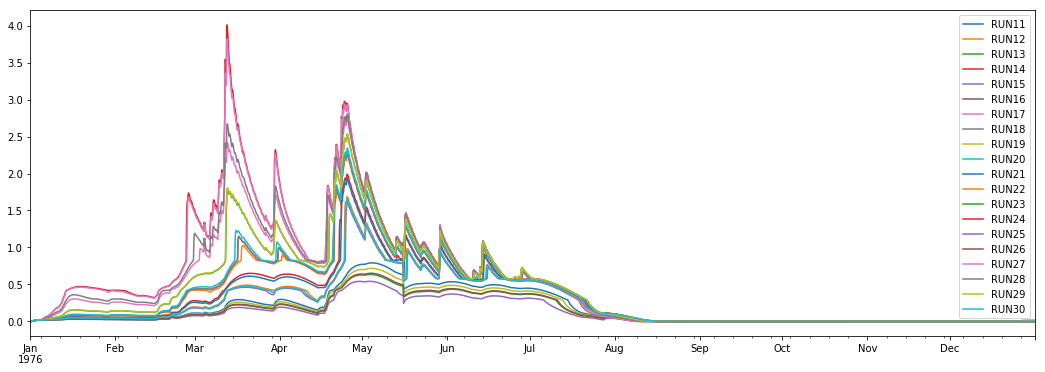

In [43]:
ts = pd.DataFrame()
for k in keys:
    colname = k[18:23]
    df = pd.read_hdf(hdfname, k)
    ts[colname] = df.ROVOL
    
ts.plot(label = 'simulated volume (ac-ft)',figsize = (18,6))

In [46]:
df = ts.describe()
df.T

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

### Use a time series for the INFILT parameter

#### First, create a time series for INFILT and save it in the HDF5 file's /Timeseries directory.

###  Constant parameters in HSPF can be replaced by time series in $\textbf{HSP}^\textbf{2}$ 


Some HSPF parameters were optionally allow to vary in time using FLAG and MONTHLY tables. The other HSPF parameters were constants.
HSPF used the following algorithm to determine the parameter's value at any time in the simulation when it was allowed to vary:
+ First interpolate monthly table values to get daily values. 
+ The values at timesteps within each day are set to the day's daily value.

However, the HSPF Special Functions capability could be used to allow any HSPF parameter to vary over time.

This capability to vary any parameter over time is made more integral to $\textbf{HSP}^\textbf{2}$.

#### IMPLIMENTATION in $\textbf{HSP}^\textbf{2}$ 

Internally, $\textbf{HSP}^\textbf{2}$, creates a time series for each parameter over the entire simulation interval at the start of each activity's code. 

The rules for creating a time series are simple:
+ Whenever the EXT_SOURCES table directs a time series with the name of an HSPF parameter (in TMEMN) to the current OPSEQ operation and segment (TVOL and TVOLNO), then this time series will be used in place of the parameter. (Because this is different bahavior than HSP2, a logged message
alerts the user whenever this is done.)
+ Otherwise, if the flag and monthly table information used by HSPF to allow a parameter to vary over time is found in the $\textbf{HSP}^\textbf{2}$ tables, then the HSPF algorithm is used to create a time series over the entire simulation interval.
+ Otherwise, this was is constant parameter in HSPF. The constant value found in for the parameter from PARAMETERS table will be used to fill the array.

There is no additional performance hit to specify a time series for a parameter since all parameters are already treated as time series internally anyway.

Get the simulation's GLOBAL data to create a time index for this simulation. The new series must at least contain the simulations start, stop boundaries.

In [47]:
gdata = pd.read_hdf(hdfname, '/CONTROL/GLOBAL')['Data']
gdata

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

The frequency does not need to be at any fixed value - HSP2 will resample (up or down) to make it correct.

In [48]:
start = pd.to_datetime(gdata['sim_start'])
stop  = pd.to_datetime(gdata['sim_end'])

tindex = pd.date_range(start, stop, freq='h')
tindex

DatetimeIndex(['1976-01-01 00:00:00', '1976-01-01 01:00:00',
               '1976-01-01 02:00:00', '1976-01-01 03:00:00',
               '1976-01-01 04:00:00', '1976-01-01 05:00:00',
               '1976-01-01 06:00:00', '1976-01-01 07:00:00',
               '1976-01-01 08:00:00', '1976-01-01 09:00:00',
               ...
               '1976-12-31 14:00:00', '1976-12-31 15:00:00',
               '1976-12-31 16:00:00', '1976-12-31 17:00:00',
               '1976-12-31 18:00:00', '1976-12-31 19:00:00',
               '1976-12-31 20:00:00', '1976-12-31 21:00:00',
               '1976-12-31 22:00:00', '1976-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8784, freq='H')

Just set some values.

In [58]:
infilt = pd.Series(0.10, index=tindex)                 # set the value of 0.10 at each timestep
infilt['1976-03-01 01:00':'1976-11-01 05:00'] = 0.20   # overwrite for all datetimes in this interval (end points included)

infilt

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

Save to the HDF5 file

In [59]:
infilt.to_hdf(hdfname, 'TIMESERIES/infilt')

####  Second, add a row to the EXT_SOURCES table to send this time series to PERLND INFILT for segment P001.

In [60]:
ext = pd.read_hdf(hdfname, '/CONTROL/EXT_SOURCES')
nrows, ncols = ext.shape

nrows, ncols

(51, 12)

In [61]:
ext.loc[nrows] = ['*', 'infilt', '', '', 1.0, '', 'PERLND', 'INFILT', '', 'P001', '', 'Adding New series to control infilt']
ext.tail()

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

In [62]:
ext.to_hdf(hdfname, '/CONTROL/EXT_SOURCES',  data_columns=True, format='table')

Now run the simulation

In [66]:
HSP2tools.run_Tutorial(hdfname, saveall=True)
#HSP2.run(hdfname)

2017-12-18 21:59:14.67   Run Started for file TutorialData/Tutorial.h5
2017-12-18 21:59:14.68     Start 1976-01-01 00:00    Stop 1976-12-31 23:59
2017-12-18 21:59:15.44   Finished setup
2017-12-18 21:59:15.46      PERLND P001   DELT=60
Found timeseries for INFILT
Found timeseries for INFILT
2017-12-18 21:59:15.61      RCHRES R001   DELT=60
2017-12-18 21:59:15.66      RCHRES R002   DELT=60
2017-12-18 21:59:15.74      RCHRES R003   DELT=60
2017-12-18 21:59:15.79      RCHRES R004   DELT=60
2017-12-18 21:59:15.85      IMPLND I001   DELT=60
2017-12-18 21:59:15.89      RCHRES R005   DELT=60
2017-12-18 21:59:15.98   Run completed


The infilt timeseries was found twice because it was made available to both SNOW and PWATER.

In [67]:
# Acquire and Calculate Stats on Run 3 and Compare to Other Runs
tsRun_3  = pd.read_hdf(hdfname, '/RESULTS/RCHRES_R001/HYDR')

dfStats.Run3 = tsRun_3.RO.describe()
dfStats

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

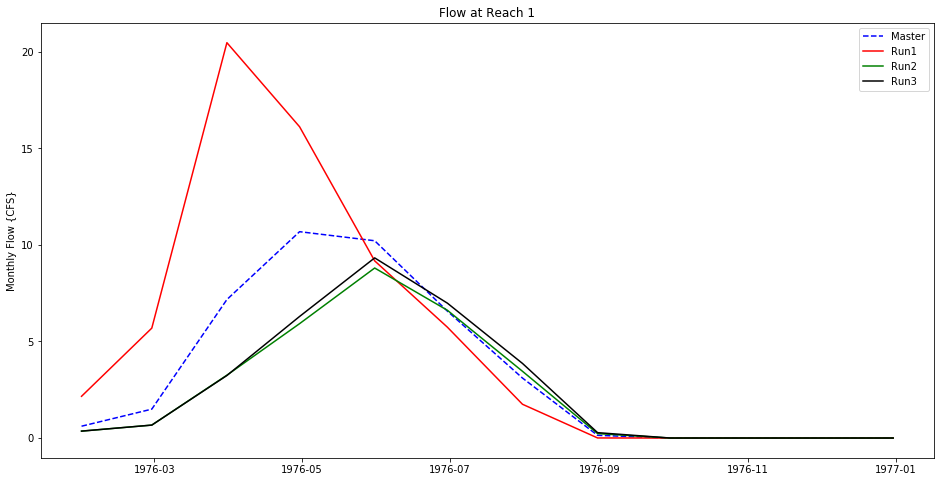

In [68]:
# Resample for Monthly Flow
m_plt.figure(figsize=(16,8))
m_plt.plot('RO', 'b--', data=tsMaster.resample('M').mean(),   label='Master')
m_plt.plot('RO', 'r',   data=tsRun_1.resample('M').mean(),    label='Run1')
m_plt.plot('RO', 'g',   data=tsRun_2.resample('M').mean(),    label='Run2')
m_plt.plot('RO', 'k',   data=tsRun_3.resample('M').mean(),    label='Run3')

m_plt.title('Flow at Reach 1')
m_plt.ylabel('Monthly Flow {CFS}')
m_plt.legend(loc='best') 

### MFACTOR and AFACTR, may replaced by a time series

+ The MFACTOR table column is found in the MASS_LINK and EXT_SOURCES tables
+ The AFACTR table column is found in the LINKS table

If an AFACTR or MFACTOR element in a table is a string that starts with an asterisk, then the string after the asterisk is the name of a timeseries to be found in the HDF5 TIMESERIES directory.  It is treated as a sparse array and padded appropriately (aggregation method SAME).

Otherwise, the AFACTOR or MFACTOR element should be a floating point number or string that can be converted into a floating point number. Internally, a timeseries is created with this value in every position.

So either way, any AFACTOR or MFACTOR is a timeseries for internal calculation. They are multiplied pointwise times the data timeseries specified by the table.


### Simulate a town growing and replacing  farm land during a simulation.

This scenario is a town (IMPLND segment I001) growing over time replacing farm land (PERLND segment P001). The total area of the two segments must remain constant. This example uses the HSPF test10 HDF5, tutorial.h5.

The total area of the two segments P001 and I001 is 9000 acres. 

The IMPLND area will increase linearly by 20% over the simulation period. That is the IMPLD segment will grow from 3000 to 3600 acres.
This requires the PERLND segment to shrink from 6000 to 5400 acres.

First, create a timeseries for IMPLND. Name it *implnd* and save in the HDF5 file.

This process uses the tindex computed in the last example.

In [69]:
implnd = pd.Series(index=tindex)
implnd[tindex[0]] = 3000.
implnd[tindex[-1]] = 1.2 * 3000.
implnd = implnd.interpolate(how='time')

implnd.to_hdf(hdfname, 'TIMESERIES/implnd')

Create a timeseries for PERLND

Start with the original PERLND area and pointwise (in time) subtract the increase in the IMPLND segment.

In [70]:
perlnd = 6000. - (implnd-3000.)         # Note: this is a full vector calculation

perlnd.to_hdf(hdfname, 'TIMESERIES/perlnd')

#### Modify the AFACTR entries in the LINKS table

It is necessary to indicate when and which time series will be used to replace a fixed AFACTR. 

In [73]:
df = pd.read_hdf(hdfname, '/CONTROL/LINKS')
df

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

The PERLND AFACTR is at table index 0, the IMPLND  AFACTR at index 5.

Modify the AFACTR entries for these two rows and save back to the HDF5 file.

In [78]:
df.loc[0, 'AFACTR'] = '*perlnd'
df.loc[5, 'AFACTR'] = '*implnd'
df.AFACTR = df.AFACTR.astype(str)   # previously all entries were floats, so Pandas made this a float typed column.
df.to_hdf(hdfname, '/CONTROL/LINKS',  data_columns=True, format='table')
qgrid.disable()
df

,SVOL,SVOLNO,AFACTR,TVOL,TVOLNO,...,MFACTOR,TMEMN,TGRPN,AUX_TS,COMMENTS
0,PERLND,P001,*perlnd,RCHRES,R001,...,,,,,
1,RCHRES,R001,1.0,RCHRES,R002,...,,,,,
2,RCHRES,R001,1.0,RCHRES,R003,...,,,,,
3,RCHRES,R002,1.0,RCHRES,R004,...,,,,,
4,RCHRES,R003,1.0,RCHRES,R004,...,,,,,
5,IMPLND,I001,*implnd,RCHRES,R005,...,,,,,
6,RCHRES,R004,1.0,RCHRES,R005,...,,,,,


Now run the simulation and look for the message displayed whenever AFACTR is replaced by a time series.

In [75]:
HSP2tools.run_Tutorial(hdfname, saveall = 'True')
#HSP2.run(hdfname)

2017-12-18 22:00:12.17   Run Started for file TutorialData/Tutorial.h5
2017-12-18 22:00:12.18     Start 1976-01-01 00:00    Stop 1976-12-31 23:59
2017-12-18 22:00:12.90   Finished setup
2017-12-18 22:00:12.92      PERLND P001   DELT=60
Found timeseries for INFILT
Found timeseries for INFILT
2017-12-18 22:00:13.06      RCHRES R001   DELT=60
FOUND timeseries for MFACTOR /RESULTS/PERLND_P001/PWATER
2017-12-18 22:00:13.16      RCHRES R002   DELT=60
2017-12-18 22:00:13.23      RCHRES R003   DELT=60
2017-12-18 22:00:13.32      RCHRES R004   DELT=60
2017-12-18 22:00:13.37      IMPLND I001   DELT=60
2017-12-18 22:00:13.48      RCHRES R005   DELT=60
FOUND timeseries for MFACTOR /RESULTS/IMPLND_I001/IWATER
2017-12-18 22:00:13.56   Run completed


In [79]:
# Acquire and Calculate Stats on Run 4 and Compare to Other Runs
tsRun_4  = pd.read_hdf(hdfname, '/RESULTS/RCHRES_R001/HYDR')

dfStats.Run4 = tsRun_4.RO.describe()
qgrid.show_grid(dfStats)

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5)

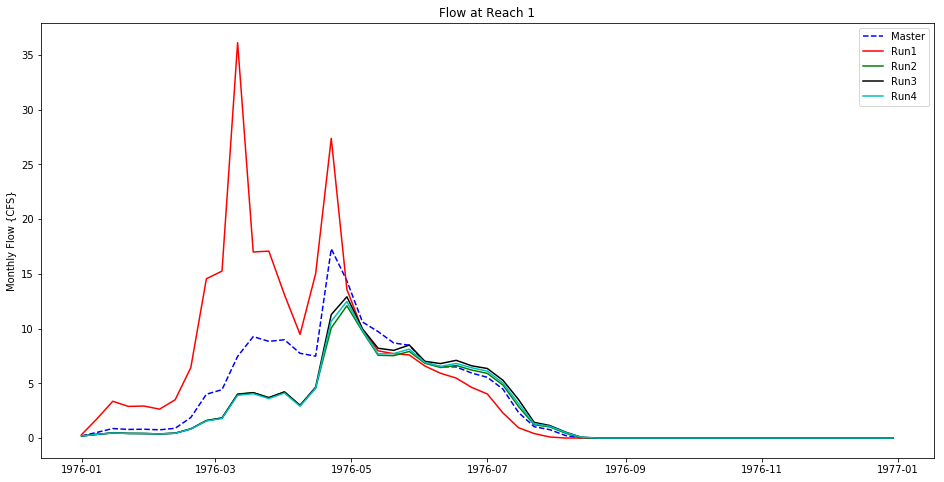

In [80]:
# Resample for Weekly Flow
m_plt.figure(figsize=(16,8))
m_plt.plot('RO', 'b--', data=tsMaster.resample('7D').mean(),   label='Master')
m_plt.plot('RO', 'r',   data=tsRun_1.resample('7D').mean(),    label='Run1')
m_plt.plot('RO', 'g',   data=tsRun_2.resample('7D').mean(),    label='Run2')
m_plt.plot('RO', 'k',   data=tsRun_3.resample('7D').mean(),    label='Run3')
m_plt.plot('RO', 'c',   data=tsRun_4.resample('7D').mean(),    label='Run4')

m_plt.title('Flow at Reach 1')
m_plt.ylabel('Monthly Flow {CFS}')
m_plt.legend(loc='best') 